# Anime LDA Topic Similarity Model

### Read data import

In [80]:
import mysql.connector as my_sql
from dotenv import load_dotenv
import os
import pandas as pd

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Read data

In [81]:
load_dotenv()

mydb = my_sql.connect(
    host=os.getenv('DATABASE_HOST'),
    user=os.getenv('DATABASE_USER'),
    password=os.getenv('DATABASE_PASSWORD'),
    database=os.getenv('DATABASE_NAME')
)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [82]:
print(mydb)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [83]:
mycursor = mydb.cursor()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [84]:
mycursor.execute('SELECT Title, Synopsis FROM MAL_Anime_Details')

df = pd.DataFrame(mycursor.fetchall(), columns=[
    'Title',
    'Synopsis'
])

df.head()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Title  \
0                     Cowboy Bebop   
1  Cowboy Bebop: Tengoku no Tobira   
2                           Trigun   
3               Witch Hunter Robin   
4                   Bouken Ou Beet   

                                            Synopsis  
0  In the year 2071, humanity has colonized sever...  
1  Another day, another bounty—such is the life o...  
2  Vash the Stampede is the man with a $$60,000,0...  
3  Witches are individuals with special powers li...  
4  It is the dark century and the people are suff...

In [85]:
mycursor.close()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


True

### Clean data imports

In [86]:
import re

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Clean data

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8290 entries, 0 to 8289
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     8290 non-null   object
 1   Synopsis  8290 non-null   object
dtypes: object(2)
memory usage: 129.7+ KB


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
# Check for duplicate titles
duplicated_title = df[df['Title'].duplicated()]
print("There are " + str(len(duplicated_title)) + " duplicate titles")

There are 0 duplicate titles


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
def filter_sources(text):
    """
    
    """
    
    new_text = re.sub('\(Source:.*\)', '', text, flags=re.IGNORECASE)
        
    new_text = re.sub('\[(Writt|from|Source).*\]', '', new_text, flags=re.IGNORECASE)
    
    return new_text.strip()

In [11]:
filtered_srcs_df = df.copy()
filtered_srcs_df['Synopsis'] = filtered_srcs_df['Synopsis'].apply(filter_sources)

In [12]:
def filter_notes(text):
    """
    
    """
    
    new_text = re.sub('Note:', '', text, flags=re.IGNORECASE)
    
    
    return new_text.strip()

In [13]:
filtered_notes_df = filtered_srcs_df.copy()
filtered_notes_df['Synopsis'] = filtered_notes_df['Synopsis'].apply(filter_notes)

In [14]:
filtered_notes_df.shape

(8222, 2)

In [15]:
# Dropping rows with no real synopsis
filtered_synopsis_df = filtered_notes_df.copy()
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'No synopsis has been added for this series yet. Click here to update this information.']
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'No synopsis information has been added to this title. Help improve our database by adding a synopsis here.']
filtered_synopsis_df.shape

(8060, 2)

In [16]:
# Dropping rows with non-useful synopsis
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'Movie based on the 1985 TV anime with an original plot.']
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'A mix of animation and live-action.']
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'Short specials added to DVDs and Blu-rays.']
filtered_synopsis_df = filtered_synopsis_df[filtered_synopsis_df['Synopsis'] != 'Special episodes added to DVDs and Blu-rays.']
filtered_synopsis_df.shape

(8046, 2)

In [17]:
def filter_japanese_characters(text):
    """
    
    """
    
    new_text = re.sub('/[\u3000-\u303F]|[\u3040-\u309F]|[\u30A0-\u30FF]|[\uFF00-\uFFEF]|[\u4E00-\u9FAF]|[\u2605-\u2606]|[\u2190-\u2195]|\u203B/g', '', text)
        
    return new_text

In [18]:
filtered_synopsis_df["Synopsis"] = filtered_synopsis_df["Synopsis"].apply(filter_japanese_characters)

In [19]:
def filter_escaped_characters(text):
    """
    NOT WORKING
    """
    
    new_text = text.replace('\\','')
        
    return new_text

In [20]:
filtered_synopsis_df["Synopsis"] = filtered_synopsis_df["Synopsis"].apply(filter_escaped_characters)

### Process data imports

In [21]:
from gensim.models import Phrases
import spacy
from spacy.lang.en import English
import string
import unidecode

### Process data

In [22]:
nlp = spacy.load("en_core_web_lg")

In [23]:
spacy_df = filtered_synopsis_df.copy()

In [24]:
def remove_people(text):
    """
    
    """
    
    text_nlp = nlp(text)
    
    for ent in text_nlp.ents:
        if(ent.label_ == 'PERSON'):
            text = text.replace(ent.text, '')
            
    return text

In [25]:
# Remove numbers
def filter_numbers(text):
    return ''.join(c for c in text if not c.isdigit())

In [26]:
def clean_text(text):
    """
    Cleans text, keeping only alphanumeric characters
        
    Parameters
    ----------
    token: str
        Word being processed

    Returns
    -------
    str:
        Cleaned string
    """
    
    cleaned_text = str(text).translate(str.maketrans(string.punctuation, ' '*len(string.punctuation)))
    cleaned_text = re.sub("[\W]+", " ", cleaned_text)
    
    return cleaned_text

In [27]:
def spacy_clean_text(text):
    """
    Lemmatizes text using spaCy
        
    Parameters
    ----------
    text: str
        Text being processed

    Returns
    -------
    str:
        Lemmatized text
    """
    
    if text == '':
        return text
    
    # Remove people
    cleaned_text = remove_people(text)
    
    # Clean  
    cleaned_text = clean_text(cleaned_text)
    
    # Tokenize
    tokens = nlp(cleaned_text.lower())
    
    remove_list = [
    'episode',
    'series',
    'short',
    'anime',
    'story',
    'film',
    'feature',
    'character',
    'special',
    'movie',
    'animation',
    'original',
    'release',
    'manga',
    'ova',
    'scene',
    'animate',
    'show',
    'volume',
    'adaptation'
    ]
    
    # Lemmatize
    lemmatized_text = ' '.join([token.lemma_.strip() for token in tokens if not token.is_stop and not token.is_punct and (token.pos_ == 'NOUN' or token.pos_ == 'ADJ' or token.pos_ == 'VERB' or token.pos_ == 'ADV') and token.lemma_.strip() not in remove_list])
    
    # Remove numbers
    no_numbers_text = filter_numbers(lemmatized_text)
    
    # Remove short words (<= 2)
    removed_singles = [x for x in no_numbers_text.split() if len(x.strip()) > 2]
    
    # Remove numbers
    full = " ".join(removed_singles)
    
    return unidecode.unidecode(full)

In [28]:
spacy_df['Corpus'] = spacy_df['Synopsis']
spacy_df = spacy_df[["Title", "Corpus"]]

spacy_df["Corpus"] = spacy_df["Corpus"].apply(spacy_clean_text).copy()

In [29]:
english_nlp = English()
english_nlp.add_pipe(english_nlp.create_pipe('sentencizer'))

def split_doc_to_sentence(doc):
    split_doc = english_nlp(doc)
    return [sent.string.strip() for sent in split_doc.sents]

In [30]:
list_of_list = list(map(lambda x: split_doc_to_sentence(x), spacy_df['Corpus'].tolist()))
flatten = lambda t: [item for sublist in t for item in sublist]
unigram_sentences = flatten(list_of_list)
unigram_sentences = [x.split() for x in unigram_sentences]

In [31]:
bigram_sentences = []
trigram_sentences = []

# to create the bigrams
bigram_model = Phrases(unigram_sentences)

# apply the trained model to a sentence
for unigram_sentence in unigram_sentences:                
    bigram_sentence = u' '.join(bigram_model[unigram_sentence])
    bigram_sentences.append(bigram_sentence)

bigram_sentences = [x.split() for x in bigram_sentences]
# get a trigram model out of the bigram
trigram_model = Phrases(bigram_sentences)

for bigram_sentence in bigram_sentences:
    trigram_sentence = u' '.join(trigram_model[bigram_sentence])
    trigram_sentences.append(trigram_sentence)

In [32]:
for i, synopsis in enumerate(trigram_sentences, start=0):
    spacy_df['Corpus'][i] = synopsis

In [33]:
spacy_df.shape

(8046, 2)

In [34]:
spacy_df = spacy_df[spacy_df['Corpus'].map(len) >= 25]

In [35]:
spacy_df.shape

(7336, 2)

### Topic Modeling

In [36]:
from collections import defaultdict
from gensim import corpora, models

In [37]:
texts = [
    [token for token in text.split()]
    for text in spacy_df['Corpus']
]

dictionary = corpora.Dictionary(texts)
no_below = int(len(texts) * 0.01)
dictionary.filter_extremes(no_below=no_below, no_above=0.5)
corpus = [dictionary.doc2bow(text) for text in texts]

In [38]:
mallet_path = os.getenv('MALLET_PATH')

def get_coherence_scores(dictionary, corpus, texts, start, stop, step):
    coherence_values = []
    model_list = []
    
    for num_topics in range(start, stop, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations=1000, optimize_interval=10)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        
    return model_list, coherence_values

In [39]:
model_list, coherence_values = get_coherence_scores(dictionary=dictionary, corpus=corpus, texts=texts, start=4, stop=31, step=1)

### Visual analysis imports

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visual analysis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


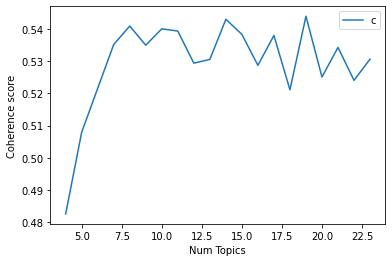

In [46]:
start=4; stop=31; step=1;
x = range(start, stop, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [47]:
for i, (m, cv) in enumerate(zip(x, coherence_values)):
    print("Index", i, ":", "Num Topics =", m, "has Coherence Value of", round(cv, 4))

Index 0 : Num Topics = 4 has Coherence Value of 0.4826
Index 1 : Num Topics = 5 has Coherence Value of 0.5079
Index 2 : Num Topics = 6 has Coherence Value of 0.5215
Index 3 : Num Topics = 7 has Coherence Value of 0.5352
Index 4 : Num Topics = 8 has Coherence Value of 0.5409
Index 5 : Num Topics = 9 has Coherence Value of 0.5349
Index 6 : Num Topics = 10 has Coherence Value of 0.54
Index 7 : Num Topics = 11 has Coherence Value of 0.5393
Index 8 : Num Topics = 12 has Coherence Value of 0.5293
Index 9 : Num Topics = 13 has Coherence Value of 0.5305
Index 10 : Num Topics = 14 has Coherence Value of 0.543
Index 11 : Num Topics = 15 has Coherence Value of 0.5383
Index 12 : Num Topics = 16 has Coherence Value of 0.5287
Index 13 : Num Topics = 17 has Coherence Value of 0.5379
Index 14 : Num Topics = 18 has Coherence Value of 0.5211
Index 15 : Num Topics = 19 has Coherence Value of 0.5439
Index 16 : Num Topics = 20 has Coherence Value of 0.5251
Index 17 : Num Topics = 21 has Coherence Value of 

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
max_value = max(coherence_values)
max_index = coherence_values.index(max_value)
print(max_index)
optimal_model = model_list[max_index]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))

15
[(0, '0.050*"base" + 0.034*"japanese" + 0.033*"include" + 0.025*"music" + 0.024*"minute" + 0.023*"main" + 0.021*"version" + 0.019*"video" + 0.018*"air" + 0.018*"show"'), (1, '0.068*"father" + 0.062*"family" + 0.053*"mother" + 0.025*"live" + 0.021*"life" + 0.018*"daughter" + 0.017*"child" + 0.017*"son" + 0.016*"brother" + 0.015*"love"'), (2, '0.082*"island" + 0.034*"treasure" + 0.027*"ship" + 0.024*"water" + 0.023*"sea" + 0.020*"crew" + 0.020*"find" + 0.017*"steal" + 0.014*"land" + 0.014*"great"'), (3, '0.070*"earth" + 0.049*"planet" + 0.031*"space" + 0.029*"alien" + 0.018*"year" + 0.017*"world" + 0.017*"destroy" + 0.016*"attack" + 0.015*"battle" + 0.013*"mysterious"'), (4, '0.067*"world" + 0.051*"city" + 0.028*"people" + 0.027*"human" + 0.025*"live" + 0.021*"life" + 0.020*"call" + 0.015*"power" + 0.013*"mysterious" + 0.013*"work"'), (5, '0.035*"power" + 0.029*"world" + 0.021*"fight" + 0.021*"battle" + 0.021*"evil" + 0.019*"defeat" + 0.018*"warrior" + 0.017*"hero" + 0.016*"great" + 0

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
def format_topics_documents(ldamodel=optimal_model, corpus=corpus, texts=texts):
    """
    Find the dominant topic in each document
    """
    
    # Init output
    doc_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Percent Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                doc_topics_df = doc_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
                
    doc_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    
    # Add original text to the end of the output
    contents = pd.Series(spacy_df['Corpus'])
    doc_topics_df = pd.concat([doc_topics_df, contents], axis=1)
    return doc_topics_df

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [50]:
df_topic_docs_keywords = format_topics_documents(ldamodel=optimal_model, corpus=corpus, texts=texts)

# Format
df_dominant_topic = df_topic_docs_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
del df_dominant_topic['Document_No']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(3, 0.32269624715187767), (15, 0.2836503261612035), (9, 0.06833802751754972), (16, 0.05866658623714619), (14, 0.04886239627386314), (11, 0.040031706496632985), (0, 0.031352212635710856), (7, 0.026328161850573326), (13, 0.023617217110563565), (18, 0.022518799169301867), (1, 0.02177281384338385), (12, 0.017229625162155978), (17, 0.0110563631914279), (5, 0.009090342609034312), (10, 0.004461392371288037), (2, 0.004132098493416864), (6, 0.002197628604721675), (8, 0.0021800515743675515), (4, 0.001818003545780973)]
0.32269624715187767
0.2836503261612035


[(14, 0.788267469597811), (2, 0.08434374845518268), (3, 0.02194922569412601), (8, 0.017742755427390035), (9, 0.014255137814434413), (18, 0.01199688355383472), (16, 0.010168740738530493), (4, 0.009747928446833521), (13, 0.009540033316905016), (11, 0.006627889983022225), (6, 0.006425586894362355), (0, 0.003735886866978808), (1, 0.003539761516209989), (5, 0.003386701981652627), (17, 0.0019745234014813887), (12, 0.0018487977822431582), (10, 0.0

In [51]:
# Show
df_dominant_topic.head(15)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic  Topic_Perc_Contrib  \
0              3.0              0.3227   
1             14.0              0.7883   
2             11.0              0.5756   
3             12.0              0.4949   
4              5.0              0.7675   
5             13.0              0.5571   
6             18.0              0.5680   
7             13.0              0.2108   
8             13.0              0.5721   
9             14.0              0.6428   
10             5.0              0.4269   
11             2.0              0.4523   
12            13.0              0.7521   
13            13.0              0.6252   
14            18.0              0.6709   

                                             Keywords  \
0   earth, planet, space, alien, year, world, dest...   
1   find, city, man, kill, detective, police, murd...   
2   life, time, leave, past, find, begin, memory, ...   
3   princess, world, magic, find, magical, book, k...   
4   power, world, fight, battle, evil, defeat, war...   
5   game, team, player, play, world, win, good, ch...   
6   girl, love, friend, day, school, life, meet, s...   
7   game, team, player, play, world, win, good, ch...   
8   game, team, player, play, world, win, good, ch...   
9   find, city, man, kill, detective, police, murd...   
10  power, world, fight, battle, evil, defeat, war...   
11  island, treasure, ship, water, sea, crew, find...   
12  game, team, player, play, world, win, good, ch...   
13  game, team, player, play, world, win, good, ch...   
14  girl, love, friend, day, school, life, meet, s...   

                                                 Text  
0   year humanity colonize_planet moon solar_syste...  
1   day bounty life unlucky crew bebop routine int...  
2   man bounty head reason merciless villain lay w...  
3   witch individual power mind control year_old c...  
4   dark century people suffer rule vandel able ma...  
5   shy kid start high_school try survive constant...  
6   sophomore art college share cheap apartment se...  
7   live shadow successful brother life profession...  
8   finally join create project goal twofold want ...  
9   elite neurosurgeon recently engage hospital_di...  
10  moment prior birth huge demon know tailed fox ...  
11  know pirate king strong infamous sail grand li...  
12  world tennis harsh highly competitive numerous...  
13  order fulfill dead father wish sibling aim tit...  
14  word love change nature bittersweet trial high...

In [54]:
def t():
    """
    Find the most representative documents for each topic
    """
    
    # Group top 5 sentences under each topic
    doc_topics_sorteddf_mallet = pd.DataFrame()

    doc_topics_outdf_grpd = df_topic_docs_keywords.groupby('Dominant_Topic')

    for i, grp in doc_topics_outdf_grpd:
        doc_topics_sorteddf_mallet = pd.concat([doc_topics_sorteddf_mallet, 
                                                 grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                                axis=0)

    # Reset Index    
    doc_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

    # Format
    doc_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

    # Show
    return doc_topics_sorteddf_mallet

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
doc_topics_sorteddf_mallet = t()
doc_topics_sorteddf_mallet.head(19)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Num  Topic_Perc_Contrib  \
0         0.0              0.8775   
1         1.0              0.9025   
2         2.0              0.8769   
3         3.0              0.9070   
4         4.0              0.8943   
5         5.0              0.9134   
6         6.0              0.8936   
7         7.0              0.8599   
8         8.0              0.8923   
9         9.0              0.8703   
10       10.0              0.8781   
11       11.0              0.9220   
12       12.0              0.9229   
13       13.0              0.9512   
14       14.0              0.8862   
15       15.0              0.9544   
16       16.0              0.8516   
17       17.0              0.9102   
18       18.0              0.9415   

                                             Keywords  \
0   base, japanese, include, music, minute, main, ...   
1   father, family, mother, live, life, daughter, ...   
2   island, treasure, ship, water, sea, crew, find...   
3   earth, planet, space, alien, year, world, dest...   
4   world, city, people, human, live, life, call, ...   
5   power, world, fight, battle, evil, defeat, war...   
6   woman, man, work, train, sex, sexual, job, fin...   
7   robot, world, create, computer, call, human, s...   
8   school, student, girl, class, high_school, tea...   
9   find, day, girl, dream, friend, begin, strange...   
10  demon, human, monster, world, power, angel, sp...   
11  life, time, leave, past, find, begin, memory, ...   
12  princess, world, magic, find, magical, book, k...   
13  game, team, player, play, world, win, good, ch...   
14  find, city, man, kill, detective, police, murd...   
15  member, club, girl, group, gang, band, find, j...   
16  friend, cat, live, adventure, town, forest, do...   
17  war, force, pilot, military, year, fight, batt...   
18  girl, love, friend, day, school, life, meet, s...   

                                                 Text  
0   year_old want normal girl easy_say raise shrin...  
1   angel eater free goddess angel share body_soul...  
2   girl like think thing get middle love soccer k...  
3                         adventure young golf player  
4   basic form life world exist goal purpose aside...  
5   join new legend reluctant hero kukuri innocent...  
6   apparitious extraterrestrial vertically mobile...  
7   year fight innovator new terrorist_organizatio...  
8   life get crazy take pupil act tournament schoo...  
9   meeting time undefeated street fighter renegad...  
10  autobiographic tale young japanese girl grow o...  
11  wrestling game player robot tall fight ring ma...  
12  condense_version second_season new animated se...  
13                                                NaN  
14  set event sweet dance princess focus melody su...  
15                          continuation right season  
16                                                NaN  
17  signal robot companion build attack pulse crea...  
18  year father leave_home mother take ill hospita...

In [62]:
def y():
    """
    Topic distribution across documents
    """
    
    # Number of Documents for Each Topic
    topic_counts = df_topic_docs_keywords['Dominant_Topic'].value_counts()

    # Percentage of Documents for Each Topic
    topic_contribution = round(topic_counts/topic_counts.sum(), 4)

    # Topic Number and Keywords
    topic_num_keywords = df_topic_docs_keywords[['Dominant_Topic', 'Topic_Keywords']]

    # Concatenate Column wise
    df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

    # Change Column names
    df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

    # Show
    return df_dominant_topics

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
y().head(19)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dominant_Topic                                     Topic_Keywords  \
0.0              3.0  earth, planet, space, alien, year, world, dest...   
1.0             14.0  find, city, man, kill, detective, police, murd...   
2.0             11.0  life, time, leave, past, find, begin, memory, ...   
3.0             12.0  princess, world, magic, find, magical, book, k...   
4.0              5.0  power, world, fight, battle, evil, defeat, war...   
5.0             13.0  game, team, player, play, world, win, good, ch...   
6.0             18.0  girl, love, friend, day, school, life, meet, s...   
7.0             13.0  game, team, player, play, world, win, good, ch...   
8.0             13.0  game, team, player, play, world, win, good, ch...   
9.0             14.0  find, city, man, kill, detective, police, murd...   
10.0             5.0  power, world, fight, battle, evil, defeat, war...   
11.0             2.0  island, treasure, ship, water, sea, crew, find...   
12.0            13.0  game, team, player, play, world, win, good, ch...   
13.0            13.0  game, team, player, play, world, win, good, ch...   
14.0            18.0  girl, love, friend, day, school, life, meet, s...   
15.0             4.0  world, city, people, human, live, life, call, ...   
16.0            17.0  war, force, pilot, military, year, fight, batt...   
17.0            17.0  war, force, pilot, military, year, fight, batt...   
18.0            13.0  game, team, player, play, world, win, good, ch...   

      Num_Documents  Perc_Documents  
0.0           899.0          0.1225  
1.0           444.0          0.0605  
2.0           166.0          0.0226  
3.0           564.0          0.0769  
4.0           266.0          0.0363  
5.0           565.0          0.0770  
6.0           366.0          0.0499  
7.0           227.0          0.0309  
8.0           377.0          0.0514  
9.0           393.0          0.0536  
10.0          209.0          0.0285  
11.0          347.0          0.0473  
12.0          286.0          0.0390  
13.0          308.0          0.0420  
14.0          296.0          0.0403  
15.0          181.0          0.0247  
16.0          396.0          0.0540  
17.0          279.0          0.0380  
18.0          767.0          0.1046

In [67]:
import pyLDAvis.gensim
import gensim
import warnings

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
warnings.filterwarnings("ignore")
pyLDAvis.enable_notebook()

In [69]:
pyLDAvis.gensim.prepare(models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model), corpus, dictionary)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_t

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.196146  0.044100       1        1  9.336288
5     -0.189452  0.015130       2        1  7.643726
3     -0.212157 -0.027218       3        1  7.232915
11     0.006212  0.089011       4        1  6.656958
1      0.114543  0.100080       5        1  6.644185
9      0.113288  0.110399       6        1  6.354502
6      0.131082  0.042903       7        1  5.548071
8      0.171980 -0.041848       8        1  5.410997
4     -0.044876  0.047774       9        1  5.064640
17    -0.141956 -0.065370      10        1  4.869690
16     0.077677  0.061641      11        1  4.853178
0      0.096428 -0.287319      12        1  4.723435
14    -0.009501  0.028996      13        1  4.576974
13     0.029407 -0.130261      14        1  4.442360
12    -0.031825  0.106925      15        1  4.101800
10    -0.164646  0.084175      16        1  3.671595
7     -0.146696 -0.100897      17        1  3.237534
15     0.083167 -0.113128      18        1  2.985171
2     -0.078820  0.034906      19        1  2.645981, topic_info=          Term         Freq        Total Category  logprob  loglift
129     school  1178.000000  1178.000000  Default  30.0000  30.0000
394       girl  1820.000000  1820.000000  Default  29.0000  29.0000
223      world  2014.000000  2014.000000  Default  28.0000  28.0000
11       earth   835.000000   835.000000  Default  27.0000  27.0000
227     father   716.000000   716.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
44    discover    28.820967   531.618673  Topic19  -4.7815   0.7173
227     father    27.668128   716.032021  Topic19  -4.8223   0.3787
200     friend    27.668128  1332.946061  Topic19  -4.8223  -0.2427
86       order    26.515289   592.123773  Topic19  -4.8649   0.5261
1    adventure    26.515289   484.726289  Topic19  -4.8649   0.7263

[915 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
153       1  0.018869    abandon
153       3  0.066043    abandon
153       4  0.207563    abandon
153       5  0.037739    abandon
153       6  0.132085    abandon
...     ...       ...        ...
349      10  0.013628  young_man
349      12  0.006814  young_man
349      14  0.006814  young_man
349      17  0.061325  young_man
349      18  0.034069  young_man

[5913 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 6, 4, 12, 2, 10, 7, 9, 5, 18, 17, 1, 15, 14, 13, 11, 8, 16, 3])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


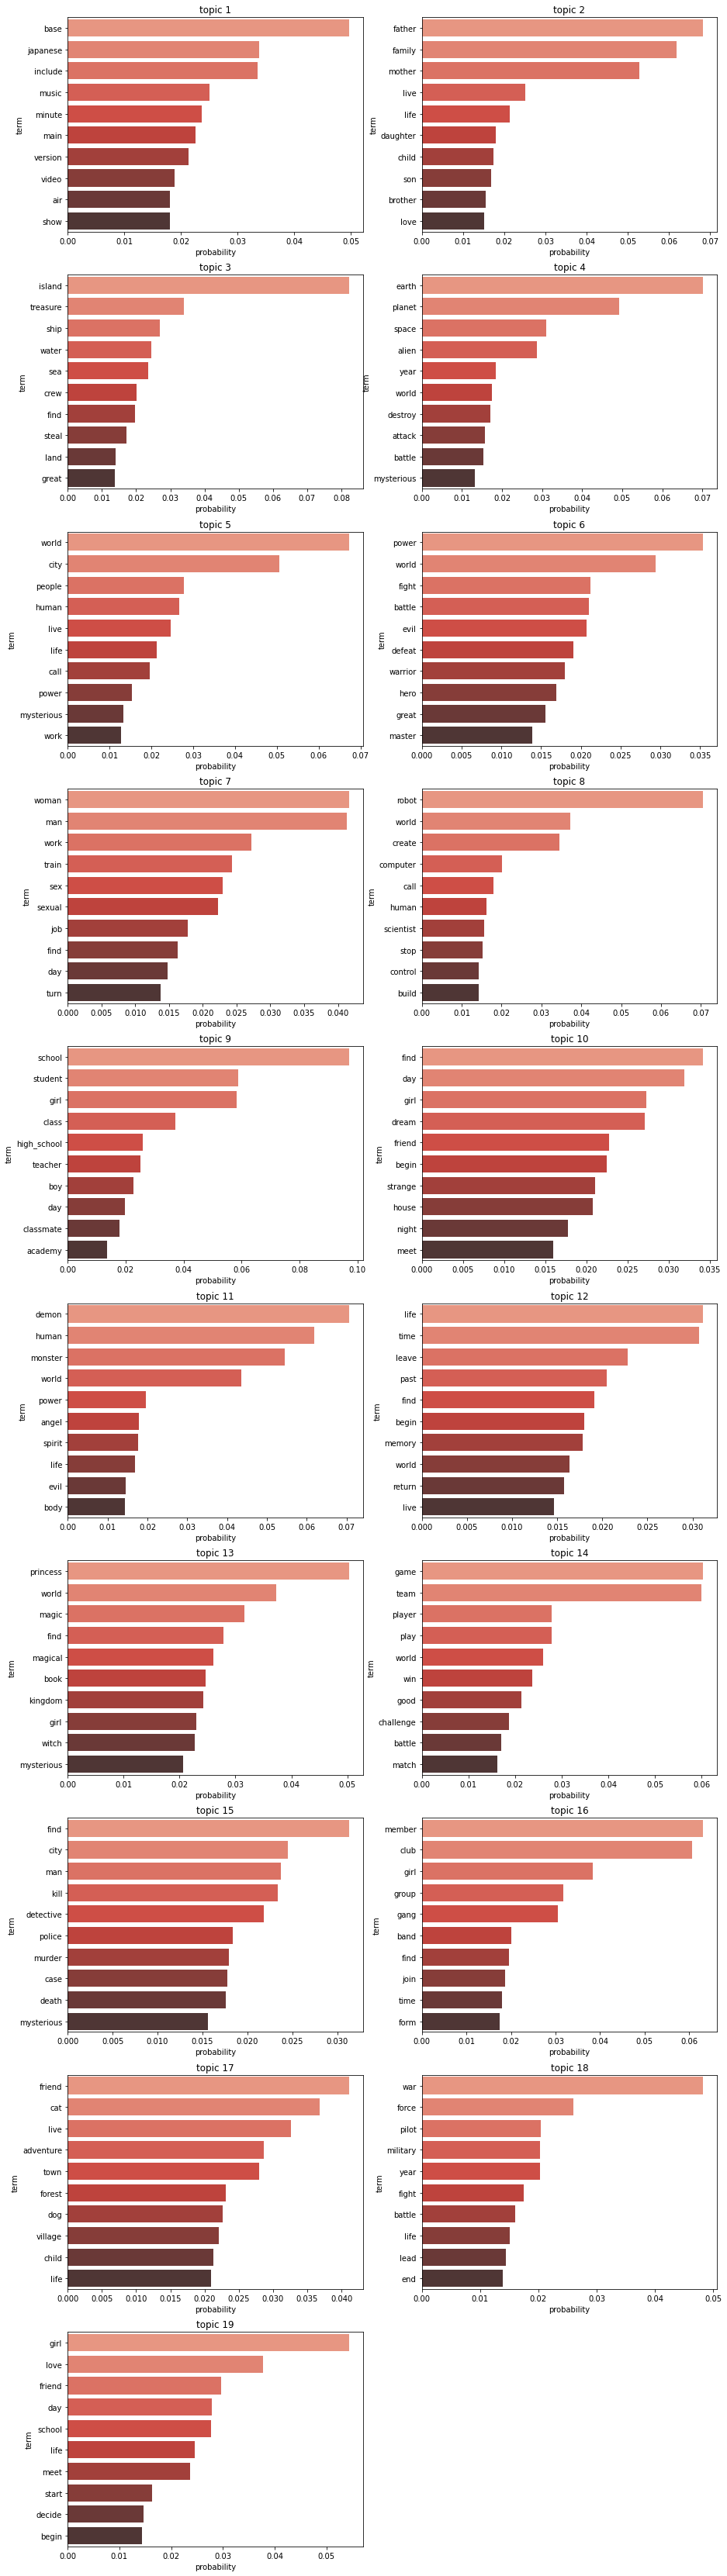

In [77]:
fiz=plt.figure(figsize=(15,60))

for i in range(19):
    df=pd.DataFrame(optimal_model.show_topic(i), columns=['term','prob']).set_index('term')
#     df=df.sort_values('prob')
    
    plt.subplot(10,2,i+1)
    plt.title('topic '+str(i+1))
    sns.barplot(x='prob', y=df.index, data=df, palette='Reds_d')
    plt.xlabel('probability')
    

plt.show()